In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from celluloid import Camera

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
a = data.mean()

In [4]:
tuple(data["Country name"].copy().sort_values())

('Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong S.A.R. of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',


In [5]:
b = data[data["Country name"] == "Indonesia"].mean()

In [6]:
c = pd.DataFrame([a, b], index=["Overall", "Indonesia"]).transpose()
c["Indonesia"]["Ladder score"]

5.345

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

figsize = (16, 4)
cols = len(b)
rows = 1



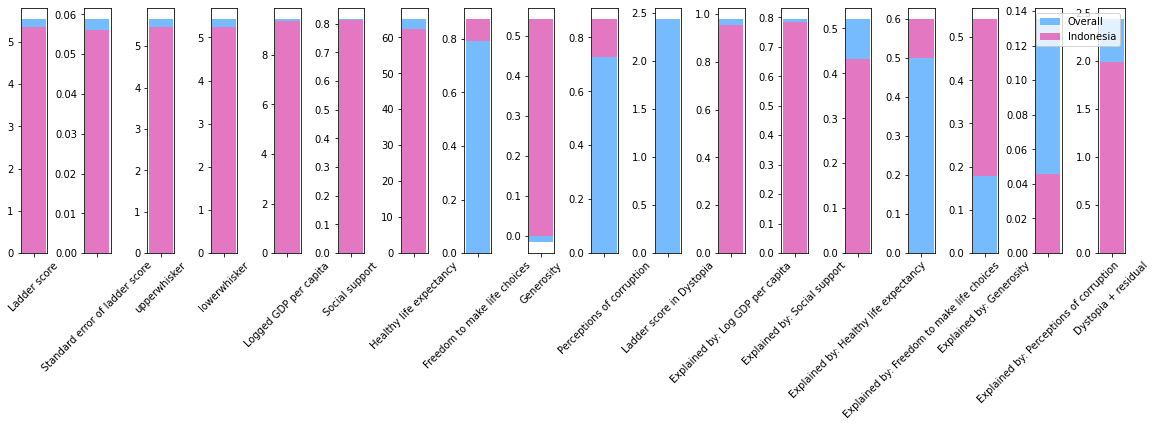

In [8]:
import matplotlib.ticker as mticker
fig1, axs = plt.subplots(rows, cols, figsize=figsize)
fig1.tight_layout()
for ax, r in zip(axs, c.index):
    order=3
    if c["Overall"][r] > c["Indonesia"][r]:
        order=1
    ax.bar(r, c["Overall"][r],zorder=order, color='xkcd:sky blue')
    ax.bar(r, c["Indonesia"][r], zorder=2, color='tab:pink')
    ax.set_xticks([r])
    ax.set_xticklabels([r], rotation=45)
ax.legend(["Overall", "Indonesia"])

In [11]:
c.index

Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
       'lowerwhisker', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

/home/dimignatiev/.local/lib/python3.8/site-packages/seaborn/regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


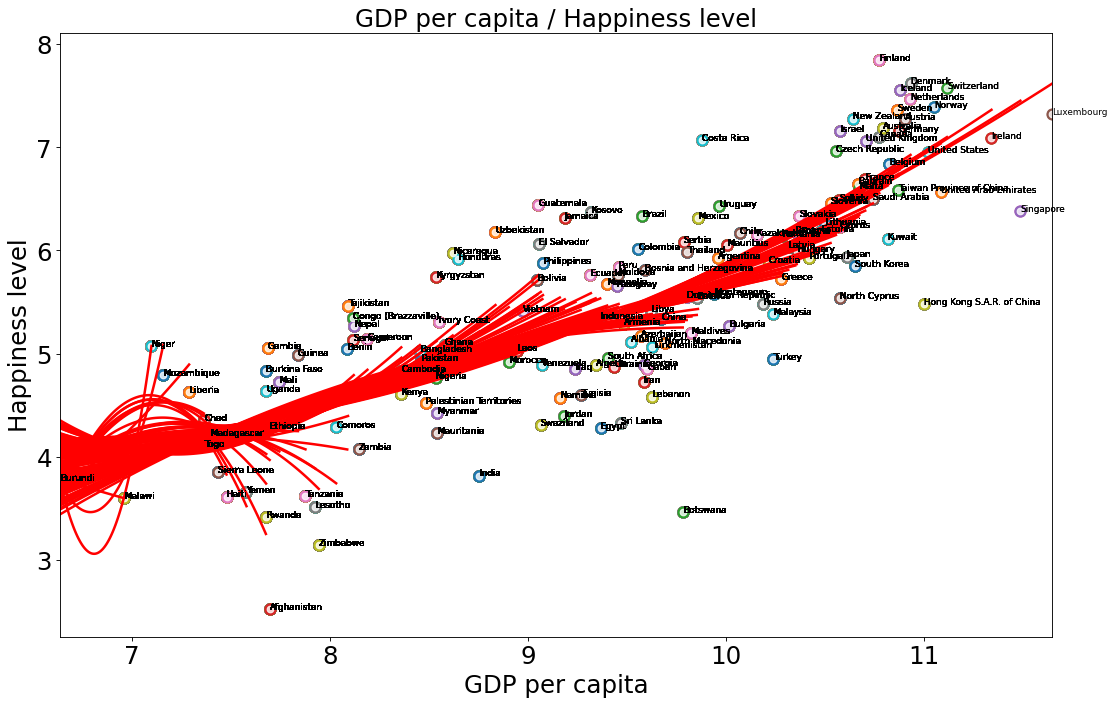

In [46]:
df = data[["Ladder score", "Logged GDP per capita", "Country name"]].copy()
df.rename(columns={"Logged GDP per capita": "GDP per capita", "Ladder score": "Happiness level"}, inplace=True)
df.sort_values("GDP per capita", inplace=True)
df.set_index("Country name", inplace=True)

fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
camera = Camera(fig)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("GDP per capita / Happiness level", fontsize=22)
plt.xlabel("GDP per capita", fontsize=22)
plt.ylabel("Happiness level", fontsize=22)

for i in range(149):
    print(i, end='\r')
    cf = df[(df["GDP per capita"] >= df["GDP per capita"].iloc[0]) &
            (df["GDP per capita"] <= df["GDP per capita"].iloc[i])]
    for country, info in cf.iterrows():
        x = info['GDP per capita']
        y = info['Happiness level']
        plt.scatter(x, y, s=100)
        plt.text(x, y, country, fontsize=8)
    sns.regplot(x='GDP per capita', y='Happiness level', data=cf, ci=None, order=2, scatter_kws={'color': 'white'},
                    line_kws={'color': 'red'})
    camera.snap()


In [47]:
animation = camera.animate()

In [48]:
animation.save('celluloid_subplots.gif', writer = 'imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


In [41]:

for i in range(10):
    print(i, end='\r')

In [4]:
terr = pd.read_csv("globalterrorismdb_0718dist.csv", sep=',', low_memory=False)

In [20]:
tr = terr[['country_txt', 'latitude', 'latitude', 'iyear']].copy()
tr.rename(columns={'country_txt': 'Country name'}, inplace=True)

In [21]:
df = data[['Country name', 'Ladder score']].copy()

In [23]:
d = df.merge(tr).set_index('Country name')

In [28]:
#d.groupby(['Country name','iyear']).sum()
d

,Ladder score,latitude,latitude,iyear
Country name,,,,
Finland,7.842,60.169813,60.169813,1986
Finland,7.842,60.169813,60.169813,1992
Finland,7.842,60.466626,60.466626,1994
Finland,7.842,60.169813,60.169813,1995
Finland,7.842,60.403930,60.403930,2007
...,...,...,...,...
Afghanistan,2.523,32.932938,32.932938,2017
Afghanistan,2.523,34.417122,34.417122,2017
Afghanistan,2.523,34.217806,34.217806,2017


In [37]:
years = tr.groupby('Country name').count()
df.set_index('Country name', inplace=True)

In [40]:
d = df.merge(years, left_index=True, right_index=True)

In [41]:
d

,Ladder score,latitude,latitude,iyear
Country name,,,,
Finland,7.842,20,20,20
Denmark,7.620,40,40,41
Switzerland,7.571,111,111,111
Iceland,7.554,4,4,4
Netherlands,7.464,126,126,130
...,...,...,...,...
Lesotho,3.512,25,25,29
Botswana,3.467,9,9,10
Rwanda,3.415,151,151,159


In [69]:
terr = pd.read_csv("globalterrorismdb_0718dist.csv", sep=',', low_memory=False)
df = data[['Country name', 'Ladder score']].copy()

In [70]:
years = terr[['country_txt', 'iyear']].groupby('country_txt').count()
years.rename(columns={'country_txt': 'Country name'}, inplace=True)
df.set_index('Country name', inplace=True)
years.index.rename('Country name', inplace=True)

In [86]:
df.merge(years, left_index=True, right_index=True)

,Ladder score,iyear
Country name,,
Finland,7.842,20
Denmark,7.620,41
Switzerland,7.571,111
Iceland,7.554,4
Netherlands,7.464,130
...,...,...
Lesotho,3.512,29
Botswana,3.467,10
Rwanda,3.415,159


In [61]:
years.index.rename('Country name', inplace=True)

In [92]:
years.rename(columns={'iyear': 'num'}).to_csv('num_of_attacks.csv', sep=',')

In [72]:
terr[['country_txt', 'iyear', 'latitude', 'longitude']]

,country_txt,iyear,latitude,longitude
0,Dominican Republic,1970,18.456792,-69.951164
1,Mexico,1970,19.371887,-99.086624
2,Philippines,1970,15.478598,120.599741
3,Greece,1970,37.997490,23.762728
4,Japan,1970,33.580412,130.396361
...,...,...,...,...
181686,Somalia,2017,2.359673,45.385034
181687,Syria,2017,35.407278,35.942679
181688,Philippines,2017,6.900742,124.437908
181689,India,2017,24.798346,93.940430


In [76]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [109]:
geolocate('Hong Kong')

(22.2793278, 114.1628131)

In [82]:
countries = df.index.to_list()
cd = {}

In [83]:
for country in countries:
    cd[country] = geolocate(country)

In [114]:
df = data[['Country name', 'Ladder score']].copy()
years = pd.read_csv('num_of_attacks.csv')
years.set_index('Country name', inplace=True)
df.set_index('Country name', inplace=True)
df = df.merge(years, left_index=True, right_index=True)

lat = [cd[country][0] for country in df.index.tolist()]
lon = [cd[country][1] for country in df.index.tolist()]
df['lat'] = lat
df['long'] = lon
df

,Ladder score,num,lat,long
Country name,,,,
Finland,7.842,20,63.246778,25.920916
Denmark,7.620,41,55.670249,10.333328
Switzerland,7.571,111,46.813331,8.444947
Iceland,7.554,4,64.984182,-18.105901
Netherlands,7.464,130,52.500170,5.748082
...,...,...,...,...
Lesotho,3.512,29,-29.603927,28.335019
Botswana,3.467,10,-23.168178,24.592874
Rwanda,3.415,159,-1.964663,30.064436


In [154]:
df = data[['Country name', 'Ladder score']].copy()
years = pd.read_csv('num_of_attacks.csv')
years.set_index('Country name', inplace=True)
df.set_index('Country name', inplace=True)
df = df.merge(years, left_index=True, right_index=True)
df.rename(columns={"Ladder score": "Happiness level"}, inplace=True)

In [155]:
lat = [cd[country][0] for country in df.index.tolist()]
lon = [cd[country][1] for country in df.index.tolist()]

In [156]:
df['lat'] = lat
df['lon'] = lon
df.reset_index(inplace=True)

In [162]:
import plotly.express as px
fig1 = px.scatter_geo(df, lat='lat', lon='lon',
                     size="# of attacks", hover_name="Country name")
fig2 = px.scatter_geo(df, lat='lat', lon='lon',
                     size="Happiness level", hover_name="Country name")


fig=px.scatter_geo()
fig.add_traces(fig1._data)
fig.add_traces(fig2._data)
fig.data[0].marker.color = 'rgba(255,0,0,0.4)'
fig.data[1].marker.color = 'rgba(0,0,255,0.3)'
fig.show()

In [164]:
data["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [165]:
regions = ['Western Europe', 'North America and ANZ']

In [168]:
df = data[data["Regional indicator"].isin(regions)]

In [169]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


Text(0, 0.5, 'Happiness level')

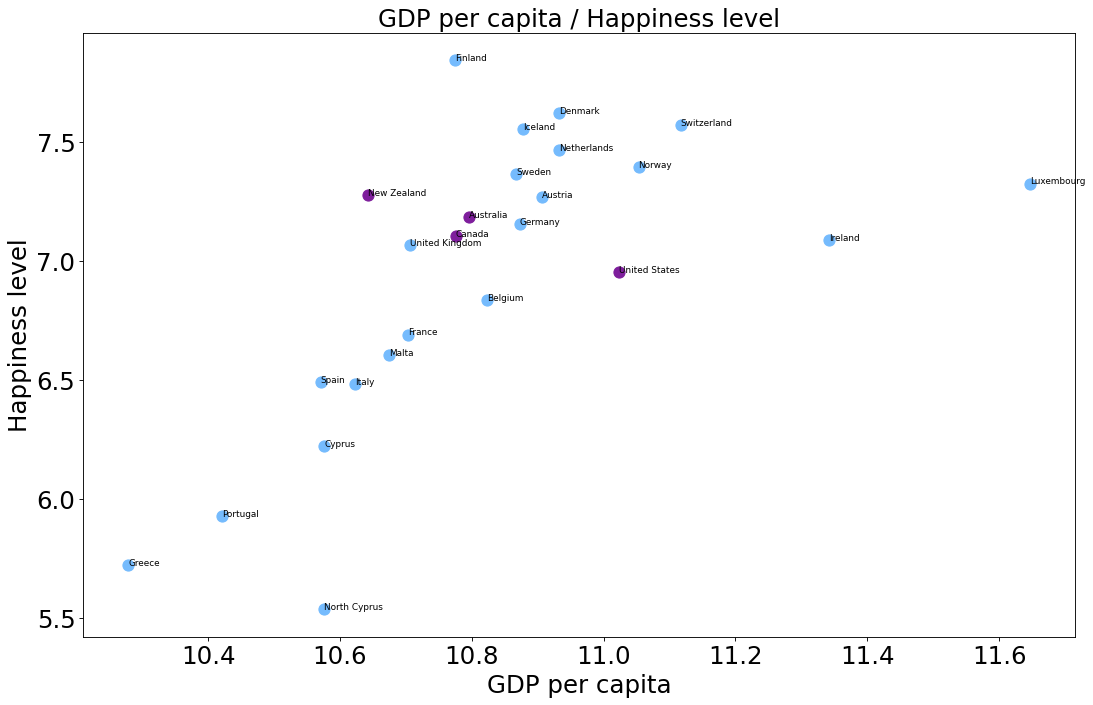

In [177]:
df = data[data["Regional indicator"].isin(regions)].copy()
df.rename(columns={"Logged GDP per capita": "GDP per capita", "Ladder score": "Happiness level"}, inplace=True)
df.sort_values("GDP per capita", inplace=True)
df.set_index("Country name", inplace=True)
fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for country, info in df.iterrows():
    x = info['GDP per capita']
    y = info['Happiness level']
    plt.scatter(x, y, s=100, color = region_color[info["Regional indicator"]])
    plt.text(x, y, country, fontsize=8)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("GDP per capita / Happiness level", fontsize=22)
plt.xlabel("GDP per capita", fontsize=22)
plt.ylabel("Happiness level", fontsize=22)

In [174]:
region_color = {'Western Europe': 'xkcd:sky blue', 'North America and ANZ': 'xkcd:purple',
       'Middle East and North Africa': 'xkcd:royal blue', 'Latin America and Caribbean': 'xkcd:burnt orange',
       'Central and Eastern Europe': 'xkcd:gold', 'East Asia': 'xkcd:pastel green', 'Southeast Asia': 'xkcd:cerulean',
       'Commonwealth of Independent States': 'xkcd:light red', 'Sub-Saharan Africa': 'xkcd:greenish yellow',
       'South Asia': 'xkcd:sienna'}

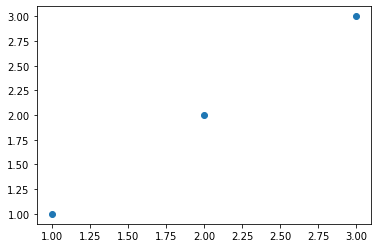

In [178]:
a = [1, 2, 3]
b = [1, 2, 3]
plt.scatter(a, b)

In [184]:
import json
opinion = 'ДА'

In [186]:
with open('stats.json', 'r') as file:
    data = json.load(file)
    if opinion == 'ДА':
        data['yes'] += 1
    else:
        data['no'] += 1
with open('stats.json', 'w') as file:
    json.dump(data, file)
    #st.balloons()